# Assignment: Data Wrangling
### `! git clone https://github.com/ds3001f25/wrangling_assignment.git`
### Do Q1 and Q2
### Reading material: `tidy_data.pdf`

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture `./data/justice_data.parquet`, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [1]:
import pandas as pd #import everything
import numpy as np #import everything
import matplotlib.pyplot as plt #import everything

1.1

I ended up with 181 missing values.

In [7]:
airbnb_df = pd.read_csv("airbnb_hw.csv") #read in the csv
airbnb_df.head() #produce the first five rows

airbnb_df["Price"].value_counts() #find the counts for each price
print(airbnb_df["Price"].unique(), '\n') #find the unique values

before = airbnb_df["Price"].notna().sum()
before #30478 is the number of values that aren't NA, but if we look at the whole set, there are no NAs to begin with

airbnb_df["Price"] = pd.to_numeric(airbnb_df["Price"], errors="coerce") #Convert to numeric
print(airbnb_df["Price"].unique(),'\n') #print unique values
airbnb_df["Price"].tail() #produces last few rows of the dataset

after = airbnb_df["Price"].notna().sum() #30297 values after getting rid of numbers with comma (above 999)

before - after #there are 181 missing values

['145' '37' '28' '199' '549' '149' '250' '90' '270' '290' '170' '59' '49'
 '68' '285' '75' '100' '150' '700' '125' '175' '40' '89' '95' '99' '499'
 '120' '79' '110' '180' '143' '230' '350' '135' '85' '60' '70' '55' '44'
 '200' '165' '115' '74' '84' '129' '50' '185' '80' '190' '140' '45' '65'
 '225' '600' '109' '1,990' '73' '240' '72' '105' '155' '160' '42' '132'
 '117' '295' '280' '159' '107' '69' '239' '220' '399' '130' '375' '585'
 '275' '139' '260' '35' '133' '300' '289' '179' '98' '195' '29' '27' '39'
 '249' '192' '142' '169' '1,000' '131' '138' '113' '122' '329' '101' '475'
 '238' '272' '308' '126' '235' '315' '248' '128' '56' '207' '450' '215'
 '210' '385' '445' '136' '247' '118' '77' '76' '92' '198' '205' '299'
 '222' '245' '104' '153' '349' '114' '320' '292' '226' '420' '500' '325'
 '307' '78' '265' '108' '123' '189' '32' '58' '86' '219' '800' '335' '63'
 '229' '425' '67' '87' '1,200' '158' '650' '234' '310' '695' '400' '166'
 '119' '62' '168' '340' '479' '43' '395' '144' '52' 

np.int64(181)

1.2

76% of the data is missing, which can be a concern. The data that is missing often has to do with force using the body or a less lethal method, like a chemical irritant.

In [14]:
force_df = pd.read_csv("mn_police_use_of_force.csv") #read in csv
force_df.head() #produce first five rows

print(force_df["subject_injury"].unique(),'\n')
print(force_df["subject_injury"].value_counts(dropna = False), '\n') #there are 9848 Na values
force_df_clean = force_df.dropna(subset = ["subject_injury"]) #removed the NA values
print(force_df_clean["subject_injury"].unique(), '\n') #generates unique values
print(force_df_clean["subject_injury"].value_counts(dropna = False), '\n') #There are 9848 values missing, which is 76%

pd.crosstab(force_df_clean["subject_injury"], force_df_clean["force_type"], dropna=False) #cross tabulates the two variables

pd.crosstab(force_df_clean["subject_injury"], force_df["force_type"], dropna = False) #Missing data happens when force uses the body or with a chemical irritant (less lethal)

[nan 'No' 'Yes'] 

subject_injury
NaN    9848
Yes    1631
No     1446
Name: count, dtype: int64 

['No' 'Yes'] 

subject_injury
Yes    1631
No     1446
Name: count, dtype: int64 



force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal Projectile,Police K9 Bite,Taser
subject_injury,,,,,,,,,
No,0,1093,131,2,33,34,1,2,150
Yes,2,1286,41,0,44,40,2,44,172


1.3

I cleaned the variable and replaced the missing values.

In [19]:
justice_df = pd.read_parquet("justice_data.parquet") #read in csv
justice_df.head() #generate first few rows

print(justice_df.dtypes)
print(justice_df.shape)
print(justice_df.columns, '\n')
print(justice_df["WhetherDefendantWasReleasedPretrial"].unique(), '\n')

#replace missing values with np.nan for the above variable
justice_df = justice_df.rename(columns={"WhetherDefendantWasReleasedPretrial": "ReleasedPretrial"}) #Rename the variable

justice_df["ReleasedPretrial"].head()
justice_df["ReleasedPretrial"].value_counts()
print(justice_df['ReleasedPretrial'].unique(),'\n')
justice_df['ReleasedPretrial'] = pd.to_numeric(justice_df['ReleasedPretrial'], errors='coerce')
justice_df['ReleasedPretrial']= justice_df['ReleasedPretrial'].replace(0,np.nan)
justice_df['ReleasedPretrial'] = justice_df['ReleasedPretrial'].astype('Int64')
justice_df["ReleasedPretrial"].head()

InternalStudyID                                                 object
REQ_REC#                                                        object
Defendant_Sex                                                   object
Defendant_Race                                                  object
Defendant_BirthYear                                             object
                                                                 ...  
NewFelonySexualAssaultArrest_Disposition                        object
Intertnalindicator_ReasonforExcludingFromFollowUpAnalysis        int64
CriminalHistoryRecordsReturnedorCMSRecordsFoundforIndividual    object
DispRecordFoundforChargesinOct2017Contact_Atleast1dispfound      int64
CrimeCommission2021ReportClassificationofDefendants             object
Length: 709, dtype: object
(22986, 709)
Index(['InternalStudyID', 'REQ_REC#', 'Defendant_Sex', 'Defendant_Race',
       'Defendant_BirthYear', 'Defendant_Age', 'Defendant_AgeGroup',
       'Defendant_AgeatCurrentArrest'

,ReleasedPretrial
0,9
1,<NA>
2,<NA>
3,<NA>
4,1


1.4

In [25]:
justice_df = justice_df.rename(columns={'ImposedSentenceAllChargeInContactEvent':'ImposedSentence'}) #Rename column
justice_df["ImposedSentence"].head() # produced first few rows

print(justice_df['ImposedSentence'].unique(),'\n')
justice_df["ImposedSentence"] = pd.to_numeric(justice_df["ImposedSentence"], errors="coerce") #Convert to numeric
print(justice_df["ImposedSentence"]) #replace missing values with na
print(justice_df['ImposedSentence'].unique(),'\n')
justice_df["ImposedSentence"].head() #produce first few rows
justice_df["ImposedSentence"] = np.ceil(justice_df["ImposedSentence"]) #round up decimals
print(justice_df["ImposedSentence"].unique(),'\n')
justice_df["ImposedSentence"].head() #produce first few rows
justice_df["ImposedSentence"] = justice_df["ImposedSentence"].astype('Int64') #convert to integer
print(justice_df["ImposedSentence"].unique(),'\n')
justice_df["ImposedSentence"].head() #produce first few rows

justice_df["SentenceTypeAllChargesAtConvictionInContactEvent"].head() #produce first few rows

[           nan 6.00000000e+01 1.20000000e+01 9.85626283e-01
 3.60000000e+01 6.00000000e+00 2.40000000e+01 5.91375770e+00
 1.20000000e+02 7.20000000e+01 1.19917864e+01 0.00000000e+00
 2.95687885e+00 8.40000000e+01 1.08000000e+02 3.00000000e+02
 2.40000000e+02 1.80000000e+02 4.00000000e+00 9.60000000e+01
 2.00000000e+00 5.40000000e+01 3.28542094e-01 4.40000000e+01
 5.00000000e+00 1.15000000e+02 1.32000000e+02 4.80000000e+01
 2.58000000e+02 3.40000000e+01 7.60000000e+01 1.64271047e-01
 1.31416838e-01 1.11000000e+02 9.00000000e+00 3.00000000e+00
 1.97125257e+00 3.69856263e+01 6.57084189e-02 3.54928131e+01
 1.06492813e+02 8.00000000e+00 3.50000000e+01 1.83141684e+01
 4.80000000e+02 3.20000000e+01 9.30000000e+01 2.34000000e+02
 7.32000000e+02 1.16427105e+00 4.65708419e+00 2.10000000e+01
 7.00000000e+00 4.49281314e+00 1.80000000e+01 6.00000000e+02
 4.31642710e+01 1.79000000e+02 5.20000000e+01 3.00000000e+01
 2.00000000e+01 1.92000000e+02 7.02000000e+02 1.40000000e+01
 5.50000000e+01 5.300000

,SentenceTypeAllChargesAtConvictionInContactEvent
0,9
1,0
2,1
3,1
4,4


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks (Hint: `GSAF5.xls`).

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

2.1

In [27]:
shark_df=pd.read_excel("GSAF5.xls") #read excel
shark_df.head() #produce first few rows
shark_df.tail() #produce last few rows

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
7037,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,...,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,NaN,NaN
7038,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,...,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,NaN,NaN
7039,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN
7040,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN
7041,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,15,...,NaN,S.W. Baker,ND-0001-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0001,ND.0001,2.0,NaN,NaN


2.2

In [30]:
print(shark_df.columns) #get all the columns
print(shark_df["pdf"].unique(), '\n') #get all unique values
print(shark_df["href formula"].unique(), '\n') #get all unique values
print(shark_df["href"].unique(), '\n') #get all unique values
print(shark_df["original order"].unique(), '\n') #get all unique values
print(shark_df["Unnamed: 22"].unique(), '\n') #get all unique values
print(shark_df["Case Number"].unique(), '\n') #get all unique values
print(shark_df["Case Number.1"].unique(), '\n') #get all unique values
print(shark_df["Unnamed: 21"].unique(), '\n') #get all unique values

missing_cols = shark_df.columns[shark_df.isnull().all()]
print("Empty Columns:", missing_cols.tolist()) #removed columns with less relevant

list = ["pdf", "href formula", "href", "Unnamed: 22", "Unnamed: 21"]
new_shark_df = shark_df.drop(list, axis=1)
print(new_shark_df.columns, '\n', new_shark_df.shape)
new_shark_df.head()

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')
[nan 'The Standard, 10/08/2022' '2022.09.25-Plett.pdf' ...
 'ND-0003-Ocracoke_1900-1905.pdf' 'ND-0002-JulesPatterson.pdf'
 'ND-0001-Ceylon.pdf'] 

[nan
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2022.09.25-Plett.pdf'
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2022.09.06-Bahamas.pdf'
 ...
 'http://sharkattackfile.net/spreadsheets/pdf_directory/ND-0003-Ocracoke_1900-1905.pdf'
 'http://sharkattackfile.net/spreadsheets/pdf_directory/ND-0002-JulesPatterson.pdf'
 'http://sharkattackfile.net/spreadsheets/pdf_directoryND-0001-Ceylon.pdf'] 

[nan
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2022.09.25-Plett.pdf'
 'http://sharkattackfile.net/spreadsheets/pdf_d

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Time,Species,Source,Case Number,Case Number.1,original order
0,16th August 2025,2025.0,Provoked,USA,Florida,Cayo Costa Boca Grande,Fishing,Shawn Meuse,M,?,Laceration to right leg below the knee,N,1055 hrs,Lemon shark 1.8 m (6ft),Johannes Marchand: Kevin McMurray Trackingshar...,NaN,NaN,NaN
1,18th August,2025.0,Unprovoked,Australia,NSW,Cabarita Beach,Surfing,Brad Ross,M,?,None sustained board severly damaged,N,0730hrs,5m (16.5ft) Great White,Bob Myatt GSAF The Guardian: 9 News: ABS News:...,NaN,NaN,NaN
2,17th August,2025.0,Unprovoked,Bahamas,Atlantic Ocean near Big Grand Cay,North of Grand Bahama near Freeport,Spearfishing,Not stated,M,63,Severe injuries no detail,N,1300hrs,Undetermined,Ralph Collier GSAF and Kevin MCMurray Tracking...,NaN,NaN,NaN
3,7th August,2025.0,Unprovoked,Australia,NSW,Tathra Beach,Surfing,Bowie Daley,M,9,None sustained board severely damaged,N,1630hrs,Suspected Great White,Bob Myatt GSAF,NaN,NaN,NaN
4,1st August,2025.0,Unprovoked,Puerto Rico,Carolina,Carolina Beach,Wading,Eleonora Boi,F,39,Bite to thigh area,N,Not stated,Undetermined,Kevin McMurray Trackingsharks.com: NY Post,NaN,NaN,NaN


2.3

In [35]:
new_shark_df["Year"].head() #generates first few rows
print(new_shark_df["Year"].value_counts(), '\n') #interesting that there are a lot of values that don't make sense (strange range)
condition = (new_shark_df["Year"] >= 1940 & (new_shark_df["Year"] <= 2026))
new_shark_df_time = new_shark_df[condition]
new_shark_df_time.head()

Year
2015.0    143
2017.0    141
2016.0    133
0.0       129
2011.0    128
         ... 
1723.0      1
1721.0      1
1703.0      1
5.0         1
2026.0      1
Name: count, Length: 261, dtype: int64 



,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Time,Species,Source,Case Number,Case Number.1,original order
0,16th August 2025,2025.0,Provoked,USA,Florida,Cayo Costa Boca Grande,Fishing,Shawn Meuse,M,?,Laceration to right leg below the knee,N,1055 hrs,Lemon shark 1.8 m (6ft),Johannes Marchand: Kevin McMurray Trackingshar...,NaN,NaN,NaN
1,18th August,2025.0,Unprovoked,Australia,NSW,Cabarita Beach,Surfing,Brad Ross,M,?,None sustained board severly damaged,N,0730hrs,5m (16.5ft) Great White,Bob Myatt GSAF The Guardian: 9 News: ABS News:...,NaN,NaN,NaN
2,17th August,2025.0,Unprovoked,Bahamas,Atlantic Ocean near Big Grand Cay,North of Grand Bahama near Freeport,Spearfishing,Not stated,M,63,Severe injuries no detail,N,1300hrs,Undetermined,Ralph Collier GSAF and Kevin MCMurray Tracking...,NaN,NaN,NaN
3,7th August,2025.0,Unprovoked,Australia,NSW,Tathra Beach,Surfing,Bowie Daley,M,9,None sustained board severely damaged,N,1630hrs,Suspected Great White,Bob Myatt GSAF,NaN,NaN,NaN
4,1st August,2025.0,Unprovoked,Puerto Rico,Carolina,Carolina Beach,Wading,Eleonora Boi,F,39,Bite to thigh area,N,Not stated,Undetermined,Kevin McMurray Trackingsharks.com: NY Post,NaN,NaN,NaN


2.4

['?' '63' '9' '39' '19' '7' '85' '69' '18' '66' '21' '40' '37' '16' '20'
 '12' '42' '26' '14' '45' '30' '30+' '56' '40+' '29' 35 58 29 24 20 55 17
 12 37 36 23 40 28 69 48 '60+' 57 45 61 27 38 16 68 33 30 15 41 14 43 26
 'Middle age' 18 21 49 25 46 19 65 64 '13' nan '11' '46' '32' '10' '64'
 '62' '22' '15' '52' '44' '47' '55' '59' '8' '50' '34' '38' '30s' '20/30'
 '35' '65' '20s' '77' '60' '49' '!2' '24' '73' '25' '50s' '58' '67' '17'
 '6' '41' '53' '68' '43' '51' '31' 39 51 10 13 60 '40s' 62 'teen' 8 22 32
 56 'Teen' 42 50 'M' 9 31 11 34 '!6' '!!' 47 7 71 59 53 54 75 '45 and 15'
 73 52 70 4 63 44 '28 & 22' '22, 57, 31' '60s' "20's" 67 74 '9 & 60'
 'a minor' 6 3 82 '40?' 66 72 '23' '36' '71' '48' '70' '18 months' '57'
 '28' '33' '61' '74' '27' '3' '28 & 26' '5' '54' '86' '18 or 20'
 '12 or 13' '46 & 34' '28, 23 & 30' 'Teens' 77 '36 & 26' '8 or 10' 84
 '\xa0 ' ' ' '30 or 36' '6½' '21 & ?' '33 or 37' 'mid-30s' '23 & 20' 5
 ' 30' '7      &    31' ' 28' '20?' "60's" '32 & 30' '16 to 18' '8

/tmp/ipython-input-3737582118.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_shark_df_time["Age"] = pd.to_numeric(new_shark_df_time["Age"], errors="coerce") #convert to numeric
/tmp/ipython-input-3737582118.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_shark_df_time['Age'] = new_shark_df_time['Age'].astype('Int64') #revert to integer


<Axes: >

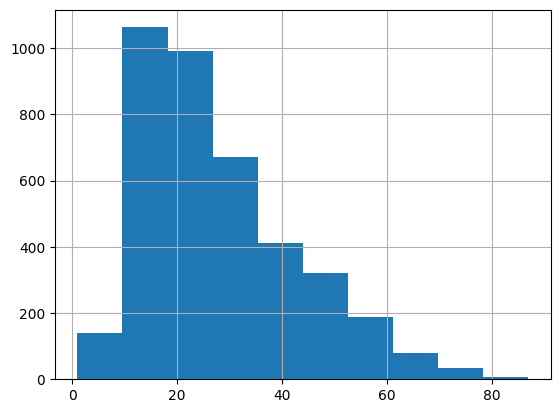

In [34]:
new_shark_df_time["Age"].head() #generate first few rows
print(new_shark_df_time['Age'].unique(), '\n') #generate unique values
new_shark_df_time["Age"] = pd.to_numeric(new_shark_df_time["Age"], errors="coerce") #convert to numeric
print(new_shark_df_time["Age"].unique(), '\n') #generate unique values
new_shark_df_time["Age"].head() #generate first few rows
new_shark_df_time['Age'] = new_shark_df_time['Age'].astype('Int64') #revert to integer
new_shark_df_time['Age'].head()

new_shark_df_time['Age'].hist() #generates histogram

2.5

In [36]:
print(new_shark_df_time['Sex'].value_counts())
print(new_shark_df_time['Sex'].unique())
new_shark_df_time['Sex'] = new_shark_df_time['Sex'].replace({
    'M ': 'M',
    'F ': 'F',
    ' M': 'M',
    'm': 'M',
    'lli': np.nan,
    'N': np.nan,
    '.': np.nan,
    "M x 2": 'M'
})
print(new_shark_df_time['Sex'].unique())
print(new_shark_df_time['Sex'].value_counts(dropna= False), '\n')

male_count = new_shark_df_time['Sex'].str.contains("M", na=False).sum()
total_count = new_shark_df_time['Sex'].notna().sum()
male_proportion = male_count / total_count
print(male_proportion)
#85.75% of the population are male

Sex
M        4328
F         718
M           3
F           2
 M          1
m           1
lli         1
M x 2       1
Name: count, dtype: int64
['M' 'F' 'F ' 'M ' nan ' M' 'm' 'lli' 'M x 2']
['M' 'F' nan]
Sex
M      4334
F       720
NaN     453
Name: count, dtype: int64 

0.8575385833003561


/tmp/ipython-input-1019778997.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_shark_df_time['Sex'] = new_shark_df_time['Sex'].replace({


2.6

In [37]:
print(new_shark_df_time["Type"].unique()) #print unique values
new_shark_df_time['Type'] = new_shark_df_time['Type'].replace({ #replace
    'Invalid': 'Unknown',
    'Questionable': 'Unknown',
    'unprovoked': 'Unprovoked',
    'Watercraft': 'Unknown',
    'Sea Disaster': 'Unknown',
    np.nan: 'Unknown',
    'Unconfirmed': 'Unknown',
    'Unverified': 'Unknown',
    'Under investigation': 'Unknown',
    'Boat': 'Unknown',
    '?': 'Unknown',
    ' Provoked': 'Provoked',
})
print(new_shark_df_time["Type"].unique())
print(new_shark_df_time["Type"].value_counts())

unprovoked_count = new_shark_df_time['Type'].str.contains("Unprovoked", na=False).sum()
total_count = new_shark_df_time['Type'].notna().sum()
unprovoked_proportion = unprovoked_count / total_count
print(unprovoked_proportion)

#approx 74.41% of the attacks are unprovoked

['Provoked' 'Unprovoked' 'Questionable' 'unprovoked' ' Provoked'
 'Watercraft' 'Sea Disaster' nan '?' 'Unconfirmed' 'Unverified' 'Invalid'
 'Under investigation' 'Boat']
['Provoked' 'Unprovoked' 'Unknown']
Type
Unprovoked    4098
Unknown        889
Provoked       520
Name: count, dtype: int64
0.7441438169602325


/tmp/ipython-input-1076051976.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_shark_df_time['Type'] = new_shark_df_time['Type'].replace({


2.7

In [38]:
print(new_shark_df_time["Fatal Y/N"].unique()) #generate unique values
new_shark_df_time['Fatal Y/N'] = new_shark_df_time['Fatal Y/N'].replace({ #replace
    'N ': 'N',
    'F': 'Unknown',
    'M': 'Unknown',
    'n': 'N',
    'Nq' : 'N',
    'UNKNOWN': 'Unknown',
     2017 : 'Unknown',
    ' N': 'N',
    'Y x 2': 'Y',
    np.nan: 'Unknown'
})
print(new_shark_df_time["Fatal Y/N"].unique()) #generate unique values

['N' 'Y' 'F' 'M' nan 'n' 'Nq' 'UNKNOWN' 2017 'Y x 2' ' N']
['N' 'Y' 'Unknown']


/tmp/ipython-input-1956313758.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_shark_df_time['Fatal Y/N'] = new_shark_df_time['Fatal Y/N'].replace({ #replace


2.8

Sharks are ok. Considering that there are still unprovoked shark attacks, I'll do my best to avoid them though.

In [41]:
pd.crosstab(new_shark_df_time["Sex"], new_shark_df_time["Type"], dropna=False) #cross tabulates the two variables
#found more unprovoked attacks on males

pd.crosstab(new_shark_df_time["Fatal Y/N"], new_shark_df_time["Type"])
#found more unprovoked attacks are actually fatal

pd.crosstab(new_shark_df_time["Fatal Y/N"], new_shark_df_time["Sex"])
#found more unprovoked attacks are fatal when the victim is male

Sex,F,M
Fatal Y/N,,
N,573,3351
Unknown,58,323
Y,89,660


2.9

In [45]:
new_shark_df_time["Species "].value_counts()
split_word = new_shark_df_time["Species "].str.split()
print(split_word)
all_word = split_word.dropna().sum()
word_count = pd.Series(all_word).value_counts()
print(word_count)

count_white_sharks = new_shark_df_time["Species "].str.contains("White", na=False).sum()
print(count_white_sharks) #count white sharks
total_species_count = new_shark_df_time["Species "].notna().sum()
white_shark_fraction = count_white_sharks/total_species_count
print(white_shark_fraction)
#13.9% are great white sharks

0       [Lemon, shark, 1.8, m, (6ft)]
1        , (16.5ft), Great, White]
2                      [Undetermined]
3           [Suspected, Great, White]
4                      [Undetermined]
                    ...              
5504                              NaN
5505                              NaN
5506         [Questionable, incident]
5507         [Questionable, incident]
5508         [Questionable, incident]
Name: Species , Length: 5507, dtype: object
shark       1971
m           1329
to           863
shark,       858
White        476
            ... 
[13'9"]        1
18'],          1
2000-lb        1
victim's       1
shoulder       1
Name: count, Length: 1113, dtype: int64
479
0.13936572592377072


In [ ]:
white_shark_attacks = new_shark_df_time[new_shark_df_time["Species "].str.contains("White", na=False)]
proportion_white_shark = len(white_shark_attacks) / len(new_shark_df_time)
print(f"The proportion of attacks by white sharks is: {proportion_white_shark:.2f}")